In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
df = pd.read_csv('kraitchman_results.csv')
df

,Method,Task,Correctness,Median_RMSD,k
0,GA,QM9,7.33000,0.84200,1
1,GA,QM9,12.40000,0.54600,5
2,DDPM,QM9,99.90000,0.00626,1
3,DDPM,QM9,99.90000,0.00625,5
4,GA,QM9-C,0.12700,1.29000,1
5,GA,QM9-C,0.22500,1.05000,5
6,DDPM,QM9-C,91.30000,0.00935,1
7,DDPM,QM9-C,93.10000,0.00882,5
8,GA,GEOM,0.03080,2.05000,1
9,GA,GEOM,0.03770,1.77000,5


In [2]:
# concatenate df.Method and df.k
df["Method_name"] = df["Method"] + " (k=" + df["k"].astype(str) + ")"
df

,Method,Task,Correctness,Median_RMSD,k,Method_name
0,GA,QM9,7.33000,0.84200,1,GA (k=1)
1,GA,QM9,12.40000,0.54600,5,GA (k=5)
2,DDPM,QM9,99.90000,0.00626,1,DDPM (k=1)
3,DDPM,QM9,99.90000,0.00625,5,DDPM (k=5)
4,GA,QM9-C,0.12700,1.29000,1,GA (k=1)
5,GA,QM9-C,0.22500,1.05000,5,GA (k=5)
6,DDPM,QM9-C,91.30000,0.00935,1,DDPM (k=1)
7,DDPM,QM9-C,93.10000,0.00882,5,DDPM (k=5)
8,GA,GEOM,0.03080,2.05000,1,GA (k=1)
9,GA,GEOM,0.03770,1.77000,5,GA (k=5)


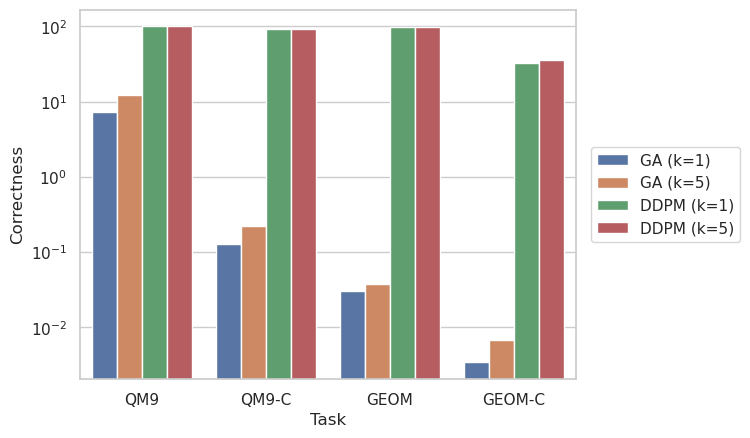

In [3]:
# bar plot of Correctness
# logscale

g = sns.barplot(x="Task", y="Correctness", hue="Method_name", data=df, log=True)
g.legend(loc='center left', bbox_to_anchor=(1.015, 0.5))

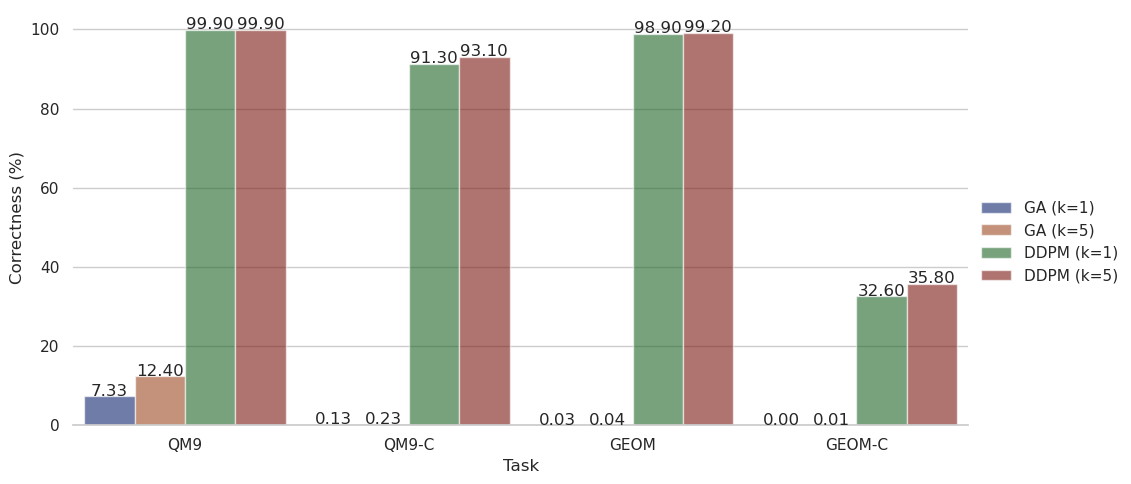

In [4]:
import matplotlib.pyplot as plt
g = sns.catplot(
    data=df, kind="bar",
    x="Task", y="Correctness", hue="Method_name", palette="dark", alpha=0.6, log=False,
    # aspect=2,  # Adjust the aspect ratio
    width=0.9,  # Adjust the width of the bars
    # margin=0.2,
    aspect=2
)
g.despine(left=True)
g.set_axis_labels("Task", "Correctness (%)")
g.legend.set_title("")

# Set y-axis ticks to specific values
# yticks = [0.01, 0.1, 1, 10, 100]  # You can customize this list as needed
# yticklabels = [str(tick) for tick in yticks]  # Format the tick labels

# plt.yscale('log')
# plt.yticks(yticks, yticklabels)

ax = g.ax

# Add text annotations on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Exclude zero height bars
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.1,  # Adjust the y-coordinate for text placement
            f'{height:.2f}',  # Format the text to two decimal places
            ha="center"
        )

# Show the plot
plt.show()

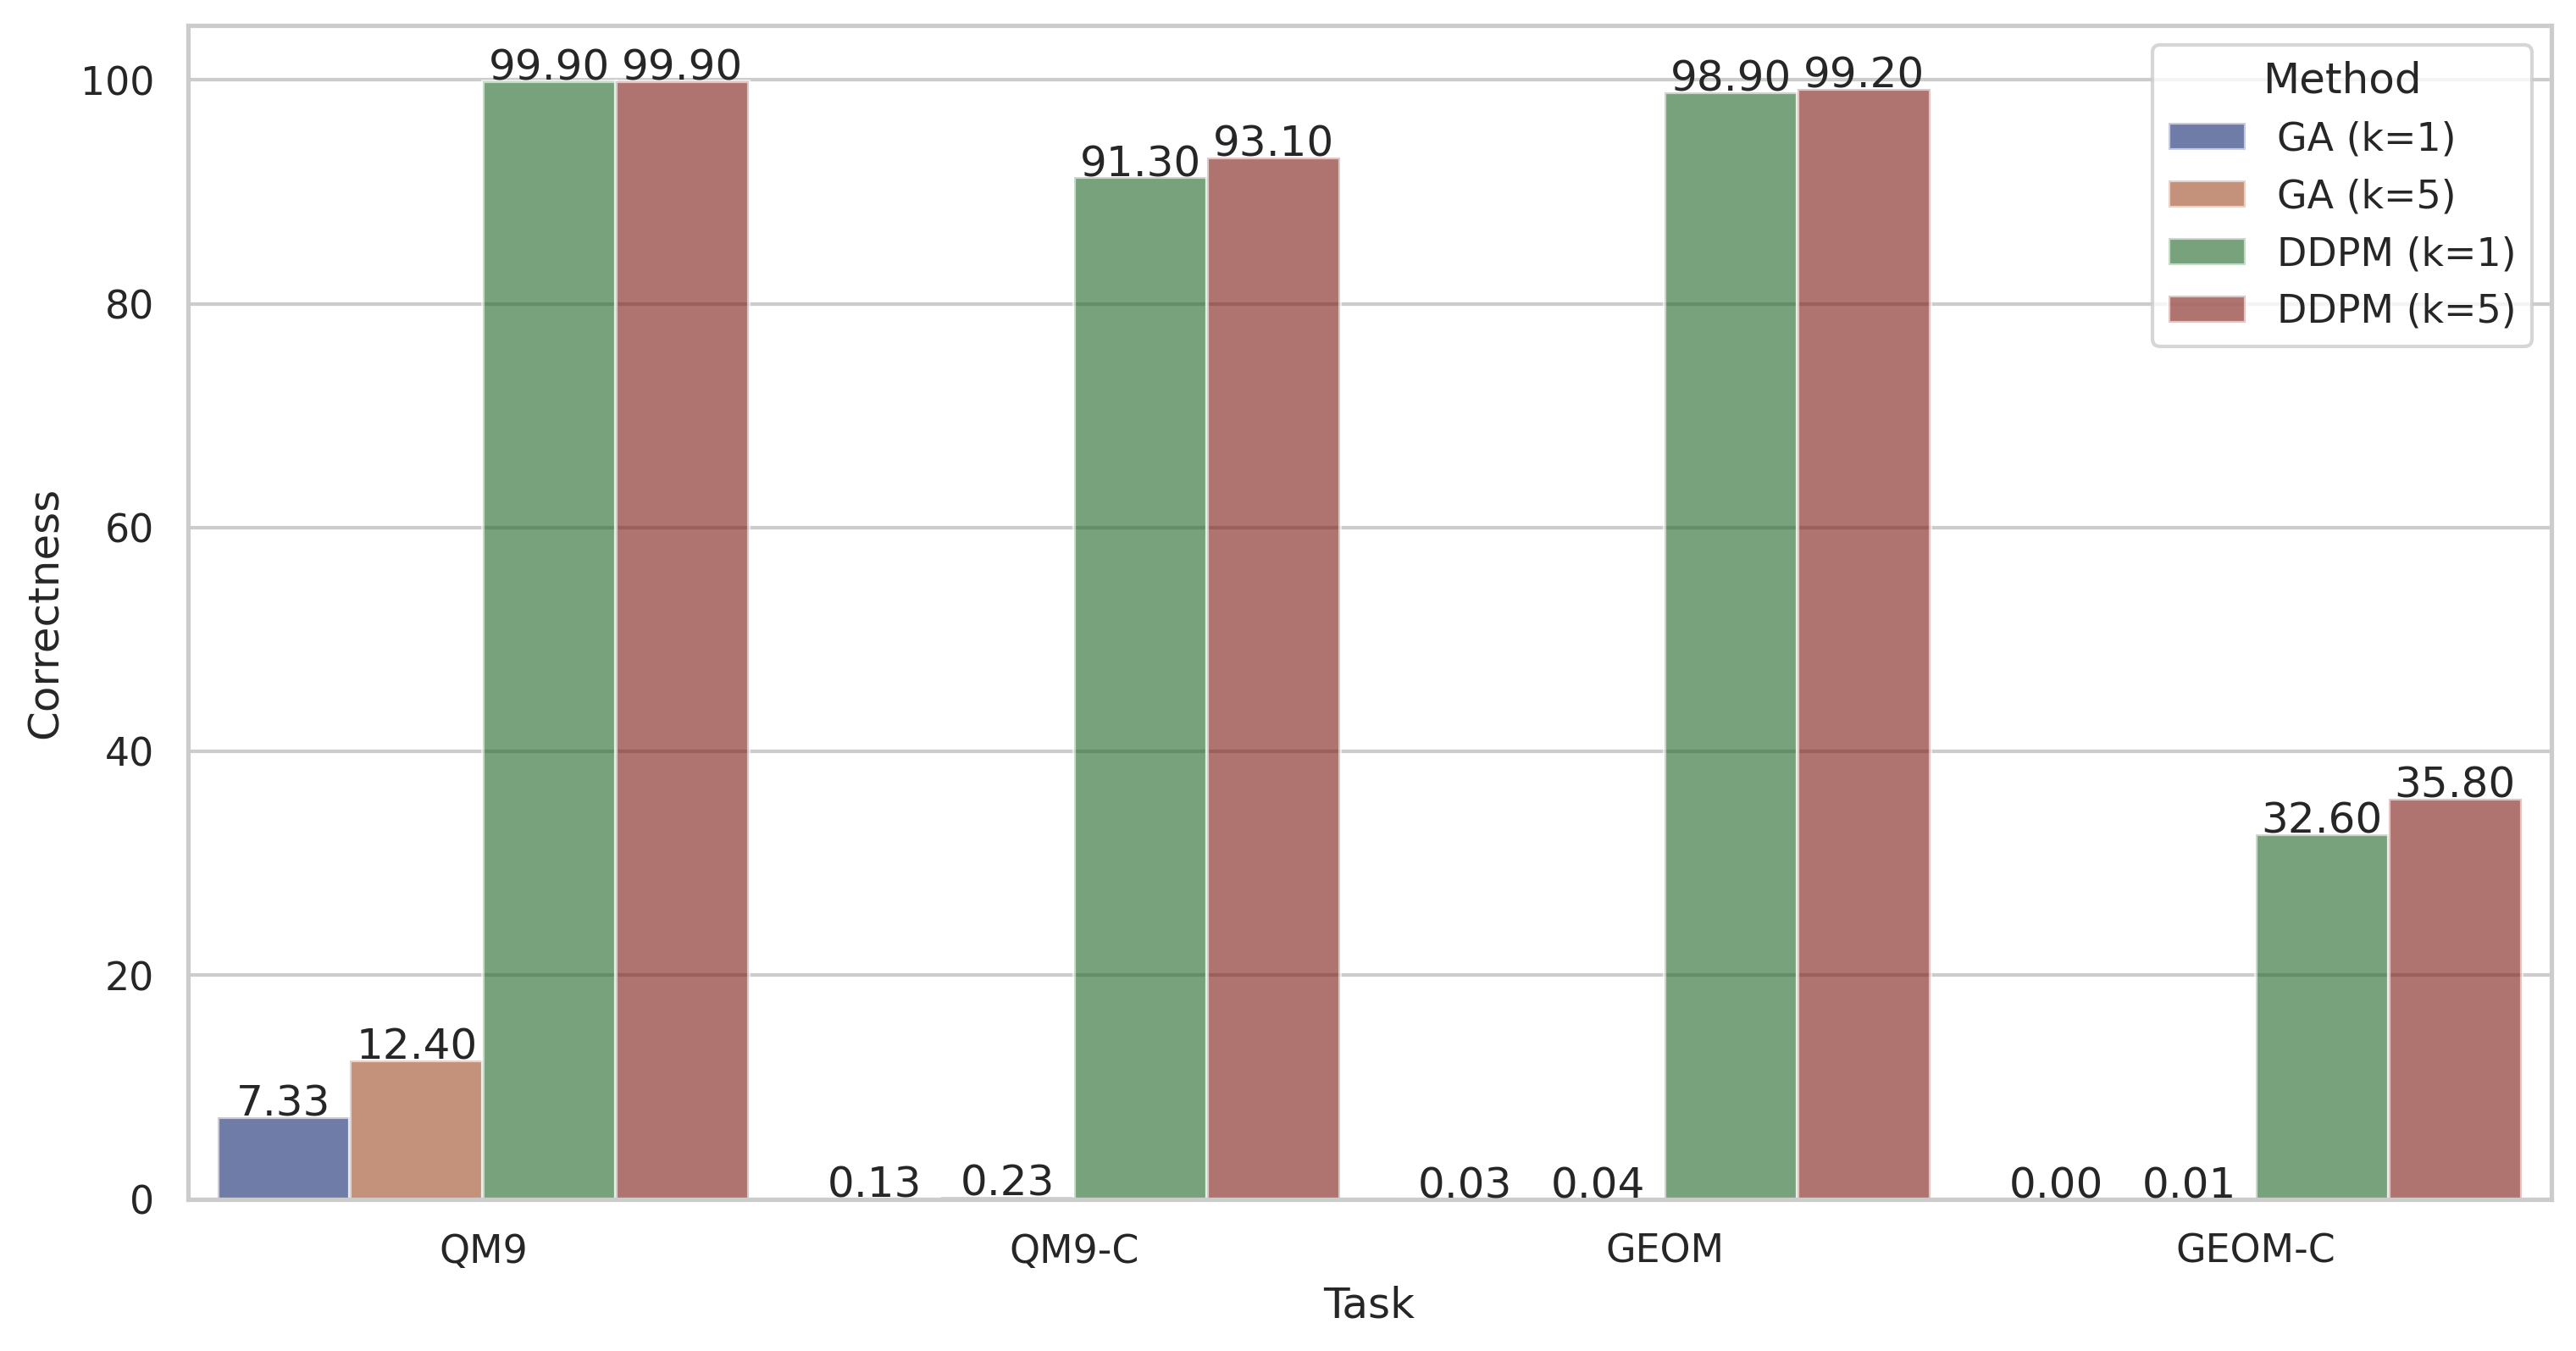

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
g = sns.barplot(
    data=df,
    x="Task", y="Correctness", hue="Method_name", palette="dark", alpha=0.6, log=False,
    # aspect=2,  # Adjust the aspect ratio
    width=0.9,  # Adjust the width of the bars
    # margin=0.2,
    ax=ax
)
# g.despine(left=True)
# g.set_axis_labels("Task", "Correctness (%)")
g.legend_.set_title("Method")

# # Set y-axis ticks to specific values
# # yticks = [0.01, 0.1, 1, 10, 100]  # You can customize this list as needed
# # yticklabels = [str(tick) for tick in yticks]  # Format the tick labels

# # plt.yscale('log')
# # plt.yticks(yticks, yticklabels)

# ax = g.ax

# Add text annotations on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Exclude zero height bars
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.1,  # Adjust the y-coordinate for text placement
            f'{height:.2f}',  # Format the text to two decimal places
            ha="center"
        )

# Show the plot
plt.show()